In [3]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#import warnings
#warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'


from IPython.display import Image



from pylab import rcParams
from sklearn.preprocessing import scale
from collections import Counter

AttributeError: module 'pandas' has no attribute 'core'

In [ ]:
KOR_FAM = pd.read_csv('KOR.csv', delimiter=';')

In [4]:
KOR_FAM.head()

,NUMBER,NAME,DESIG,FAM,S,CLASS,S.1,F,DIA.,S.2,...,F.3,AMIN,AMAX,U,NOTES,BIN,PRI,SAM,SD,WF
0,158,Koronis,NaN,KOR,S,S,C,NaN,34.25,L,...,NaN,0.28,0.43,3.0,NaN,NaN,NaN,Y,NaN,NaN
1,167,Urda,NaN,KOR,S,S,L,NaN,44.00,M,...,NaN,0.24,0.39,3.0,NaN,NaN,NaN,Y,NaN,NaN
2,208,Lacrimosa,NaN,KOR,S,S,C,NaN,40.70,L,...,NaN,0.15,0.33,3.0,NaN,NaN,NaN,Y,NaN,NaN
3,243,Ida,NaN,KOR,S,S,S,NaN,27.99,M,...,NaN,0.45,0.86,3.0,NaN,B,NaN,Y,NaN,NaN
4,263,Dresda,NaN,KOR,S,S,D,NaN,23.16,L,...,NaN,0.37,0.55,3.0,NaN,NaN,NaN,Y,NaN,NaN


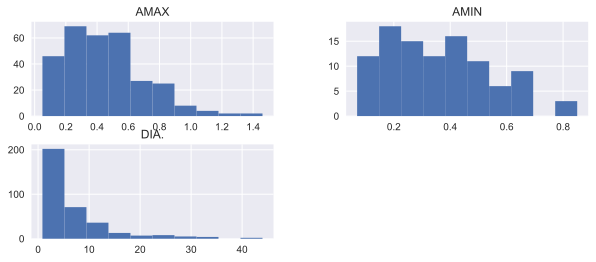

In [24]:
hist2 = ['DIA.', 'AMIN', 'AMAX']
KOR_FAM[hist2].hist(figsize=(10, 4));

1

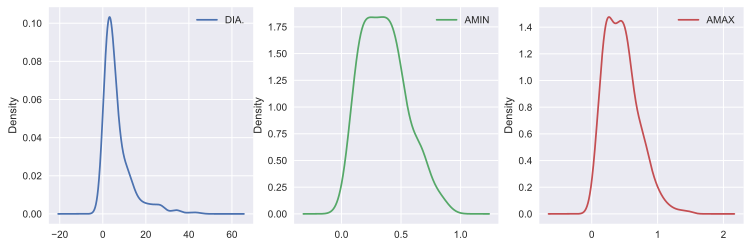

In [27]:
KOR_FAM[hist2].plot(kind='density', subplots=True, layout=(1, 3), 
                  sharex=False, figsize=(12.5,4)); 1

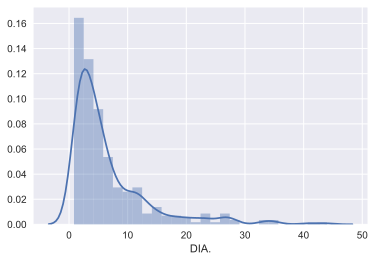

In [20]:
sns.distplot(KOR_FAM['DIA.']);

In [23]:
KOR_FAM.head()

,NUMBER,NAME,DESIG,FAM,S,CLASS,S.1,F,DIA.,S.2,...,F.3,AMIN,AMAX,U,NOTES,BIN,PRI,SAM,SD,WF
0,158,Koronis,NaN,KOR,S,S,C,NaN,34.25,L,...,NaN,0.28,0.43,3.0,NaN,NaN,NaN,Y,NaN,NaN
1,167,Urda,NaN,KOR,S,S,L,NaN,44.00,M,...,NaN,0.24,0.39,3.0,NaN,NaN,NaN,Y,NaN,NaN
2,208,Lacrimosa,NaN,KOR,S,S,C,NaN,40.70,L,...,NaN,0.15,0.33,3.0,NaN,NaN,NaN,Y,NaN,NaN
3,243,Ida,NaN,KOR,S,S,S,NaN,27.99,M,...,NaN,0.45,0.86,3.0,NaN,B,NaN,Y,NaN,NaN
4,263,Dresda,NaN,KOR,S,S,D,NaN,23.16,L,...,NaN,0.37,0.55,3.0,NaN,NaN,NaN,Y,NaN,NaN


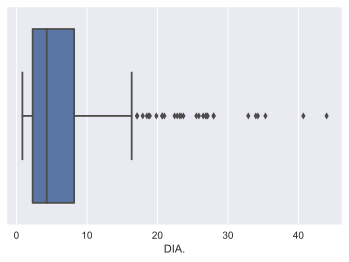

In [28]:
sns.boxplot(x='DIA.', data=KOR_FAM);

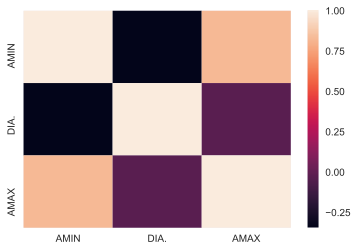

In [29]:
numerical = list(set(['DIA.', 'AMIN', 'AMAX']))
corr_matrix = KOR_FAM[numerical].corr()
sns.heatmap(corr_matrix);

In [30]:
KOR_FAM.corr()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,PRI
NUMBER,1.000000,NaN,-0.446402,0.734957,NaN,NaN,0.086165,-0.089082,NaN,NaN,0.229128,0.244176,-0.225887,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIA.,-0.446402,NaN,1.000000,-0.869331,NaN,NaN,-0.380458,0.008682,NaN,NaN,-0.344202,-0.032543,0.573855,NaN
H,0.734957,NaN,-0.869331,1.000000,NaN,NaN,0.203845,-0.054857,NaN,NaN,0.368148,0.159012,-0.509303,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALBEDO,0.086165,NaN,-0.380458,0.203845,NaN,NaN,1.000000,-0.000942,NaN,NaN,0.039944,-0.050656,-0.207505,NaN
PERIOD,-0.089082,NaN,0.008682,-0.054857,NaN,NaN,-0.000942,1.000000,NaN,NaN,0.114537,0.033888,-0.179472,NaN
P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DESC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Amplitud mínima')

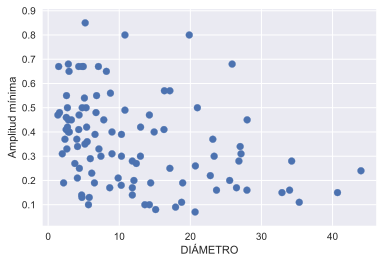

In [31]:
plt.scatter(KOR_FAM['DIA.'], KOR_FAM['AMIN']);
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Amplitud mínima', fontdict=None, labelpad=None)

Text(0,0.5,'Amplitud máxima')

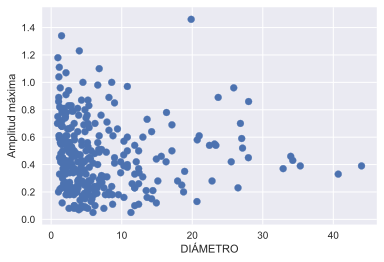

In [74]:
plt.scatter(KOR_FAM['DIA.'], KOR_FAM['AMAX']);
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Amplitud máxima', fontdict=None, labelpad=None)

Text(0,0.5,'Magnitud Absoluta')

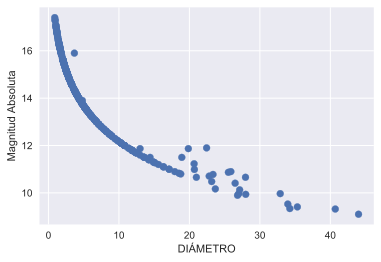

In [75]:
plt.scatter(CKOR['DIA.'], CKOR['H']);
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Magnitud Absoluta', fontdict=None, labelpad=None)

In [80]:
x= np.array(CKOR['DIA.'])
y= np.array(CKOR['H'])

np.polyfit(np.log(x),y,1)

array([-2.11196268, 17.10944524])

Text(0,0.5,'Magnitud Absoluta')

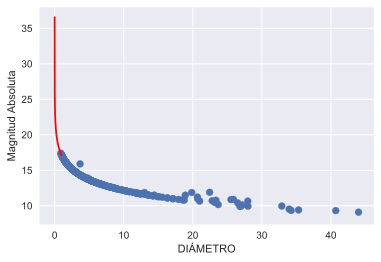

In [101]:
import pylab
s=np.linspace(0,1,10000)
t=-2.11196268*np.log(s) + 17.10944524

plt.plot(s,t, 'r')
plt.scatter(CKOR['DIA.'], CKOR['H']);
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Magnitud Absoluta', fontdict=None, labelpad=None)

## Eliminando asteroides con datos incompletos

In [45]:
KOR_FAM.describe(include=['object'])

,NAME,DESIG,FAM,S,CLASS,S.1,S.2,S.3,F.2,F.3,NOTES,BIN,SAM,SD,WF
count,348,340,348,348,348,348,348,348,28,13,90,4,49,10,242
unique,348,340,1,4,3,5,8,4,2,1,6,1,1,1,1
top,2007 SN19,1997 GC22,KOR,A,S,C,T,A,>,>,-,B,Y,Y,Y
freq,1,1,348,318,344,309,169,316,15,13,35,4,49,10,242


In [34]:
KOR_FAM.describe()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,PRI
count,348.000000,0.0,348.000000,348.000000,0.0,0.0,348.000000,319.000000,0.0,0.0,102.000000,309.000000,310.000000,0.0
mean,61520.632184,NaN,6.701351,13.936351,NaN,NaN,0.234896,14.412988,NaN,NaN,0.358333,0.454175,2.161290,NaN
std,92905.128092,NaN,6.969700,1.857049,NaN,NaN,0.023935,33.328644,NaN,NaN,0.183999,0.254959,0.521187,NaN
min,158.000000,NaN,0.850000,9.100000,NaN,NaN,0.057000,1.000000,NaN,NaN,0.070000,0.050000,1.000000,NaN
25%,4624.500000,NaN,2.300000,12.600000,NaN,NaN,0.240000,3.827000,NaN,NaN,0.200000,0.240000,2.000000,NaN
50%,16512.500000,NaN,4.300000,14.000000,NaN,NaN,0.240000,6.000000,NaN,NaN,0.340000,0.420000,2.000000,NaN
75%,76045.000000,NaN,8.190000,15.392500,NaN,NaN,0.240000,10.839000,NaN,NaN,0.470000,0.600000,2.000000,NaN
max,512729.000000,NaN,44.000000,17.500000,NaN,NaN,0.276600,321.546000,NaN,NaN,0.850000,1.460000,3.000000,NaN


Tenemos 348 asteroides, de los cuales tienen:

348, el valor del diámetro

102, amplitud mínima

309, aplitud máxima 

319, Periodo

In [46]:
KOR_FAM.replace([np.inf, -np.inf], np.nan)
CKOR=KOR_FAM.dropna(subset=['DIA.', 'AMAX'])
#new_EOS_FAM = EOS_FAM.drop('DIA',axis ='columns')


In [47]:
CKOR.head()

,NUMBER,NAME,DESIG,FAM,S,CLASS,S.1,F,DIA.,S.2,...,F.3,AMIN,AMAX,U,NOTES,BIN,PRI,SAM,SD,WF
0,158,Koronis,NaN,KOR,S,S,C,NaN,34.25,L,...,NaN,0.28,0.43,3.0,NaN,NaN,NaN,Y,NaN,NaN
1,167,Urda,NaN,KOR,S,S,L,NaN,44.00,M,...,NaN,0.24,0.39,3.0,NaN,NaN,NaN,Y,NaN,NaN
2,208,Lacrimosa,NaN,KOR,S,S,C,NaN,40.70,L,...,NaN,0.15,0.33,3.0,NaN,NaN,NaN,Y,NaN,NaN
3,243,Ida,NaN,KOR,S,S,S,NaN,27.99,M,...,NaN,0.45,0.86,3.0,NaN,B,NaN,Y,NaN,NaN
4,263,Dresda,NaN,KOR,S,S,D,NaN,23.16,L,...,NaN,0.37,0.55,3.0,NaN,NaN,NaN,Y,NaN,NaN


In [48]:
CKOR.describe()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,PRI
count,309.000000,0.0,309.000000,309.000000,0.0,0.0,309.000000,305.000000,0.0,0.0,102.000000,309.000000,296.000000,0.0
mean,53135.097087,NaN,6.982265,13.839968,NaN,NaN,0.234834,14.337517,NaN,NaN,0.358333,0.454175,2.168919,NaN
std,80357.989375,NaN,7.224322,1.837313,NaN,NaN,0.024746,33.732669,NaN,NaN,0.183999,0.254959,0.532197,NaN
min,158.000000,NaN,0.890000,9.100000,NaN,NaN,0.057000,1.000000,NaN,NaN,0.070000,0.050000,1.000000,NaN
25%,4365.000000,NaN,2.530000,12.600000,NaN,NaN,0.240000,3.822000,NaN,NaN,0.200000,0.240000,2.000000,NaN
50%,15421.000000,NaN,4.420000,13.940000,NaN,NaN,0.240000,6.034000,NaN,NaN,0.340000,0.420000,2.000000,NaN
75%,66969.000000,NaN,8.190000,15.160000,NaN,NaN,0.240000,10.697000,NaN,NaN,0.470000,0.600000,2.000000,NaN
max,512729.000000,NaN,44.000000,17.400000,NaN,NaN,0.276600,321.546000,NaN,NaN,0.850000,1.460000,3.000000,NaN


In [49]:
CKOR.corr()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,PRI
NUMBER,1.000000,NaN,-0.444196,0.731859,NaN,NaN,0.090955,-0.089243,NaN,NaN,0.229128,0.244176,-0.235775,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIA.,-0.444196,NaN,1.000000,-0.873455,NaN,NaN,-0.406771,0.004975,NaN,NaN,-0.344202,-0.032543,0.580705,NaN
H,0.731859,NaN,-0.873455,1.000000,NaN,NaN,0.238911,-0.050947,NaN,NaN,0.368148,0.159012,-0.525731,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALBEDO,0.090955,NaN,-0.406771,0.238911,NaN,NaN,1.000000,-0.001425,NaN,NaN,0.039944,-0.050656,-0.205168,NaN
PERIOD,-0.089243,NaN,0.004975,-0.050947,NaN,NaN,-0.001425,1.000000,NaN,NaN,0.114537,0.033888,-0.181115,NaN
P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DESC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


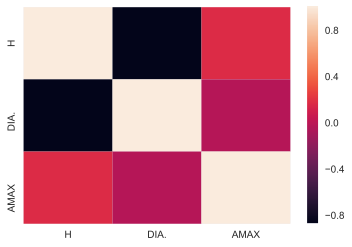

In [50]:
numerical2 = list(set(['DIA.','H', 'AMAX']))
corr_matrix2 = CKOR[numerical2].corr()
sns.heatmap(corr_matrix2);

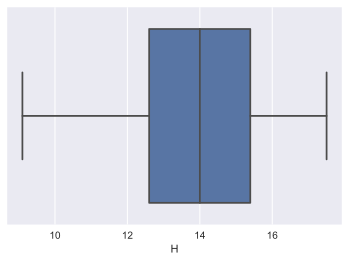

In [54]:
sns.boxplot(x='H', data=KOR_FAM);

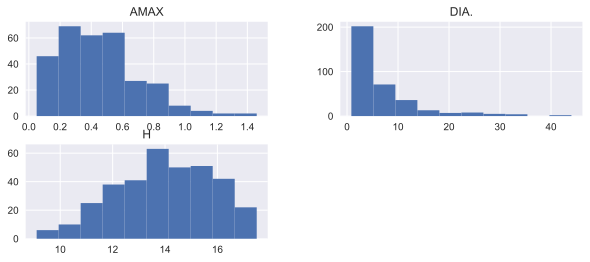

In [102]:
hist4 = ['DIA.', 'H', 'AMAX']
KOR_FAM[hist4].hist(figsize=(10, 4));

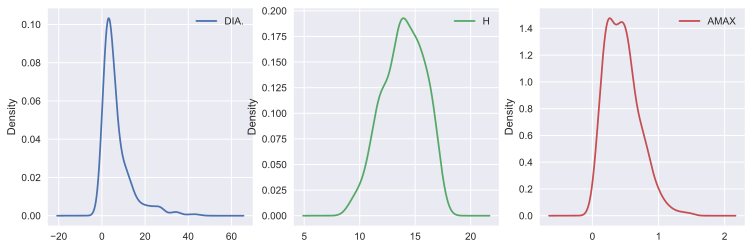

In [58]:
KOR_FAM[hist4].plot(kind='density', subplots=True, layout=(1, 3), 
                  sharex=False, figsize=(12.5,4));

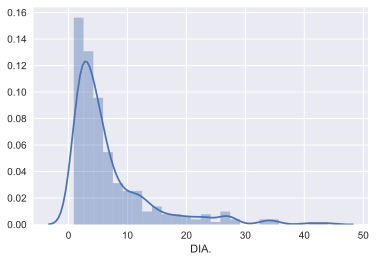

In [62]:
sns.distplot(CKOR['DIA.']);

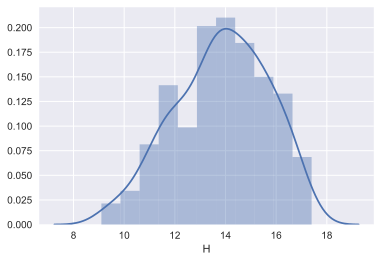

In [63]:
sns.distplot(CKOR['H']);

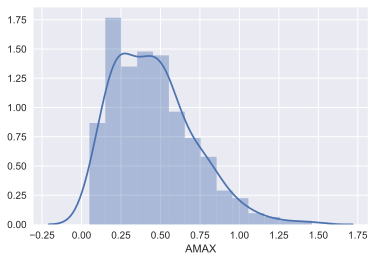

In [64]:
sns.distplot(CKOR['AMAX']);

In [1]:
sns.distplot(CKOR['AMAX']);

NameError: name 'sns' is not defined

In [78]:
CKOR.describe()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,PRI
count,309.000000,0.0,309.000000,309.000000,0.0,0.0,309.000000,305.000000,0.0,0.0,102.000000,309.000000,296.000000,0.0
mean,53135.097087,NaN,6.982265,13.839968,NaN,NaN,0.234834,14.337517,NaN,NaN,0.358333,0.454175,2.168919,NaN
std,80357.989375,NaN,7.224322,1.837313,NaN,NaN,0.024746,33.732669,NaN,NaN,0.183999,0.254959,0.532197,NaN
min,158.000000,NaN,0.890000,9.100000,NaN,NaN,0.057000,1.000000,NaN,NaN,0.070000,0.050000,1.000000,NaN
25%,4365.000000,NaN,2.530000,12.600000,NaN,NaN,0.240000,3.822000,NaN,NaN,0.200000,0.240000,2.000000,NaN
50%,15421.000000,NaN,4.420000,13.940000,NaN,NaN,0.240000,6.034000,NaN,NaN,0.340000,0.420000,2.000000,NaN
75%,66969.000000,NaN,8.190000,15.160000,NaN,NaN,0.240000,10.697000,NaN,NaN,0.470000,0.600000,2.000000,NaN
max,512729.000000,NaN,44.000000,17.400000,NaN,NaN,0.276600,321.546000,NaN,NaN,0.850000,1.460000,3.000000,NaN


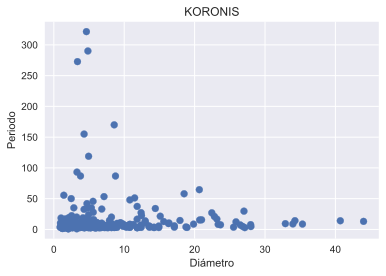

In [103]:
plt.scatter(CKOR['DIA.'], CKOR['PERIOD']);
plt.title("KORONIS")
plt.xlabel("Diámetro")
plt.ylabel("Periodo")
plt.show()


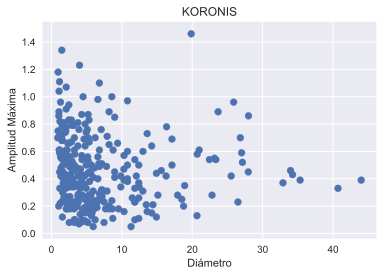

In [106]:
plt.scatter(CKOR['DIA.'], CKOR['AMAX']);
plt.title("KORONIS")
plt.xlabel("Diámetro")
plt.ylabel("Amplitud Máxima")
plt.show()